# K-means in Python



## Activity Overview

This activity is designed to consolidate your knowledge about k-means clustering and to teach you  how to define those in `Python` using the `sklearn` library.

We'll use a synthetic dataset from `sklearn` to visualize the clusters and choose an optimal number for the data we have.



## Basics of k-means

The k-means clustering method is an *unsupervised machine learning* technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable ones. These traits make implementing k-means clustering in `Python` reasonably straightforward, even for novice programmers and data scientists.

Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. In practice, clustering helps identify two qualities of data:


- **Meaningfulness** - find clusters to expand knowledge about the domain

- **Usefulness** - find clusters that can serve as an intermediate step in a data pipeline. 


There are many applications of clustering, such as document clustering and social network analysis. Clustering applications are relevant in nearly every industry, making clustering a valuable skill for professionals working with data in any field.

### Algorithm of k-means Clustering

Next, we ’ll take a step-by-step tour of the conventional version of the k-means algorithm. Understanding the details of the algorithm is a fundamental step in the process of writing your k-means clustering pipeline in Python. What you learn in this section will help you decide if k-means is the right choice to solve your clustering problem.

Conventional k-means requires only a few steps:


```Python
- Specify the number of clusters to assign. Remember that the number of clusters is considered a hypeparameter of this model.
- Randomly specify the starting centroids.
- Repeat for optimization:
    - Until the centroids positions do not change:
        - Assign the data points to their closest centroids.
        - Calculate new centroids for each cluster. 
```

The core of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then the maximization step computes the mean of all the points for each cluster and sets the new centroid to that mean.

## Setting up the Problem

In this section, we will perform this calculation using a small example on a machine learning dataset.

We can generate a small binary (2 class) classification problem using the `make_blobs()` function from the `sklearn` library in a similar way as we did in the notebook about Bayesian probability.

In the code cell below, we've imported the function `make_blobs` from `sklearn` and used that to generate 300 synthetic cluster points with two numerical input variables, each assigned one of two the classes. 



In [16]:
from sklearn.datasets import make_blobs

In this exercise, `make_blobs()` uses these parameters:

- `n_samples` is the total number of samples to generate.
- `centers` is the number of centers to generate.
- `cluster_std` is the standard deviation
- `random_state` is a parameter to ensure reproducibility of the results.


In [19]:
features, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)


Here’s a look at the first five elements for each of the variables returned by `make_blobs()`:

In [20]:
features[:5]

array([[ 0.42857674,  4.9739971 ],
       [ 1.61990909,  0.06764529],
       [ 1.43289271,  4.37679234],
       [-1.57846247,  3.03445802],
       [-1.65862863,  2.26746029]])

In [21]:
true_labels[:5]

array([0, 1, 0, 2, 2])

In the code cell below, we import the plotting library `matplotlib` to visualize the points we've created above in a scatter plot.

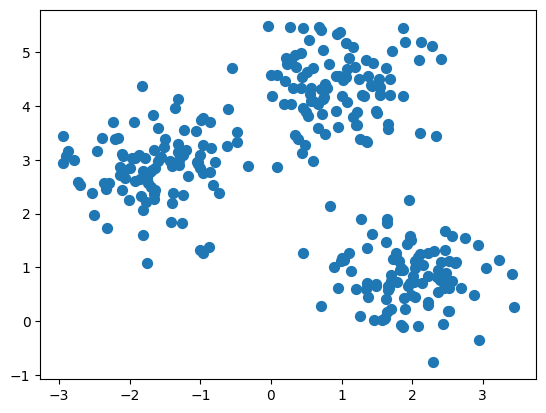

In [22]:
import matplotlib.pyplot as plt
plt.scatter(features[:, 0], features[:, 1], s=50);

## Standardizing Your Data

In the real world, datasets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. Thus, the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as **feature scaling**. 

There are several approaches to implementing feature scaling. A great resource to determine which technique is appropriate for your dataset is the [`sklearn`’s preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html).

In this example, you’ll use the `StandardScaler` class from `sklearn`. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1.

Run the code cells below:

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Run the code cell below to take a look at how the values have been scaled in scaled_features:

In [25]:
scaled_features[:5]

array([[-0.00288843,  1.46120589],
       [ 0.73445459, -1.67573046],
       [ 0.61870585,  1.07937569],
       [-1.2450912 ,  0.22113774],
       [-1.29470788, -0.26925169]])

We can also plot the scaled data to see if it looks similar to our original feature data but  which is now shifted and scaled (note the different axes):

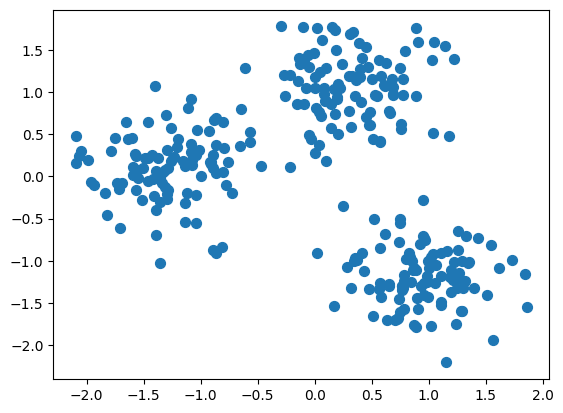

In [26]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=50);

## Clustering the Data

Now the data-points are ready to be clustered. The [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator class in `sklearn` is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several hyperparameters that can be tuned.

Here are the parameters used in this example:

- `init` controls the initialization technique. The standard version of the k-means algorithm is implemented by setting `init` to `"random"`.

- `n_clusters` sets `k` for the clustering step. 



In [27]:
from sklearn.cluster import KMeans


kmeans = KMeans( init="random", n_clusters=4,random_state=11)


Now that the `k-means` class is ready, the next step is to fit it and predict the data in `scaled_features`.

In [28]:
#apply fit on the normalized features
kmeans.fit(scaled_features)

y_kmeans = kmeans.predict(scaled_features)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

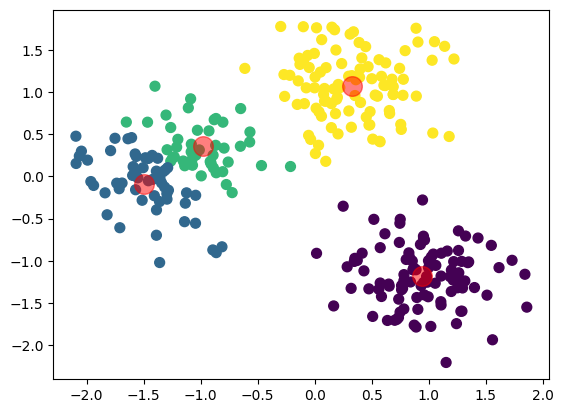

In [29]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

#getting the coordinates of the centers
centers = kmeans.cluster_centers_
#plotting the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Choosing the Appropriate Number of Clusters

The optimal number of the cluster assignments can be decided in different ways. A common one is based on some measure of error, such as the sum of the squared error (SSE) after the centroids converge. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. 

$$\text{SSE} = \sum_{i=1}^n \left(x_i - \bar{x}\right)^2.$$

Since this is a measure of error, the objective of k-means is to try to minimize this value.

In this section, you’ll look at one method that is commonly used to evaluate the appropriate number of clusters: the **elbow method**. While larger $k$ can only result in smaller SSE, at some value for $k$, we start to see diminishing returns: the SSE decreases only a little, at the cost of an extra cluster. To perform the elbow method, we run several k-means, increment k with each iteration, and record the SSE. There's usually a sweet spot where the SSE curve starts to bend, known as the *elbow point*.

In the code cell below, we compute the SSE for a varying number of clusters between 1 and 10.

In [30]:
kmeans_kwargs = {"init": "random", "random_state": 42}

# A list holds the SSE values for each k
sse = []

#computing the SSE for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) 
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)#getting the SSE

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Finally, in the code cell below, we plot the elbow curve.

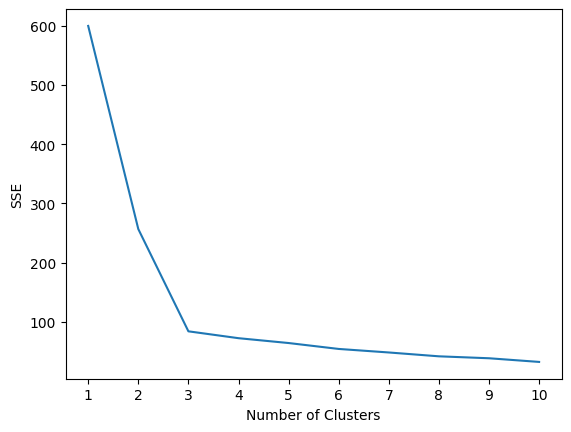

In [31]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()